# UNDESTAND THE PROBLEM STATEMENT AND BUSINESS CASE

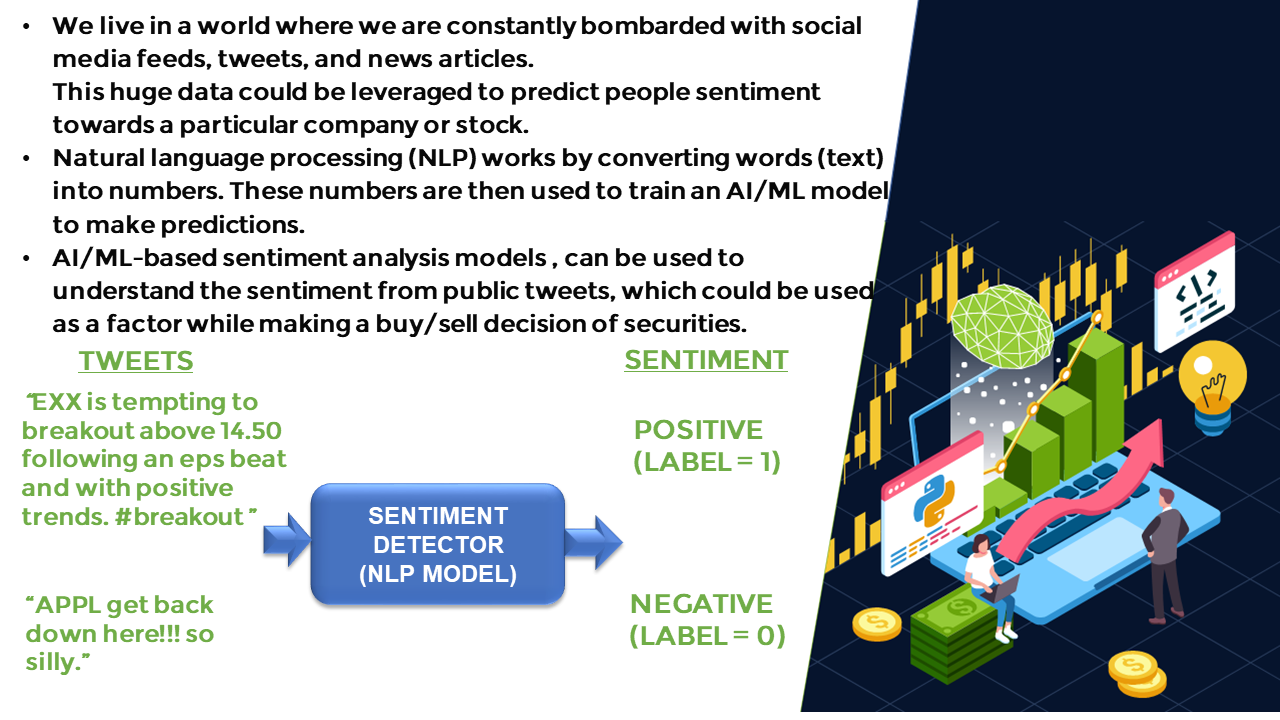

# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [2]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [3]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [5]:
# install gensim
# Gensim is an open-soure library for unsupervised topic modeling and NLP
# Gensim is implemented in Python and Cython
!pip install gensim


In [6]:
#load the stock news data
stock_df = pd.read_csv('/content/drive/MyDrive/Stock Predictions/stock_sentiment.csv')

In [7]:
#view the dataset
stock_df

Text  Sentiment
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2     user I'd be afraid to short AMZN - they are lo...          1
3                                     MNTA Over 12.00            1
4                                      OI  Over 21.37            1
...                                                 ...        ...
5786  Industry body CII said #discoms are likely to ...          0
5787  #Gold prices slip below Rs 46,000 as #investor...          0
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1
5790  #Sensex, #Nifty climb off day's highs, still u...          1

[5791 rows x 2 columns]

In [8]:
#dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [9]:
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

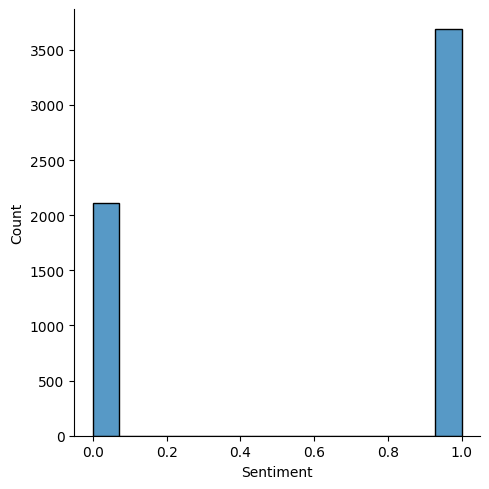

In [10]:
#unique values
sns.displot(stock_df['Sentiment'])

In [11]:
stock_df['Sentiment'].nunique()

2

# PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
Test = '$ML & deep learning!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]

In [14]:
Test_punc_removed

['M',
 'L',
 ' ',
 ' ',
 'd',
 'e',
 'e',
 'p',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g']

In [15]:
Test_punc_removed_join = ''.join(Test_punc_removed) # Join the characters again to form the string.

In [16]:
Test_punc_removed_join

'ML  deep learning'

In [21]:
Test1 = "# AI in finance!?"
Test1_punc_removed = [char for char in Test1 if char not in string.punctuation]
Test1_punc_removed

[' ', 'A', 'I', ' ', 'i', 'n', ' ', 'f', 'i', 'n', 'a', 'n', 'c', 'e']

In [23]:
Test1_punc_removed_join = ''.join(Test1_punc_removed) # Join the characters again to form the string.
Test1_punc_removed_join

' AI in finance'

Another way:

In [47]:
Test2 = "# AI in finance!?"

In [48]:
def removed_punc(message):        #list comprehension
    Test2_punc_removed = [ char for char in message if char not in string.punctuation]
    Test2_punc_removed_join = ''.join(Test2_punc_removed)
    return Test2_punc_removed_join

In [49]:
# Let's remove punctuations from our dataset
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(removed_punc)

In [50]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

In [ ]:
#Test_punc_removed = []
#for char in Test:
 #   if char not in string.punctuation:
  #      Test_punc_removed.append(char)

### Join the characters again to form the string.
#Test_punc_removed_join = ''.join(Test_punc_removed)
#Test_punc_removed_join

# PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [51]:
#Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
stopwords.words('english') #words not impactful or contribute to models

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
#Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])


In [55]:
#Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in stop_words and len(token)>=3:
      result.append(token)

  return result


In [56]:
#Apply pre-processing to the text (without) column
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

In [58]:
stock_df['Text Without Punctuation & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                   Text Without Punctuation & Stopwords  
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1     [movie, return, feageed, indicator, trades, aw...  
2     [afraid, short, amzn, looking, like, nearmonop...  
3                                                [mnta]  
4                                                    []  
...                                                 ...  
5786  [industry, body, cii, said, discoms, likely, s...  
5787  [gold, prices, slip, investors, book, profits,...  
5788  [workers, bajaj, auto, agreed, wage, cut, peri...  
5789  [sharemarket, live, sensex, high, points, nift...  
5790  [sensex, nifty, climb, days, highs, still, key...  

[5791 rows x 4 columns]

In [63]:
stock_df['Text'][2] #let us check

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [64]:
stock_df['Text Without Punctuation & Stopwords'][2]

['afraid', 'short', 'amzn', 'looking', 'like', 'nearmonopoly', 'ebooks']

# PLOT WORDCLOUD

In [67]:
#Join the words into a string
stock_df['Text Without Punctuation & Stopwords Joined'] = stock_df['Text Without Punctuation & Stopwords'].apply(lambda x: " ".join(x))
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                   Text Without Punctuation & Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, feageed, indicator, trades, aw...   
2     [afraid, short, amzn, looking, like, nearmonop...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, days, highs, still, key...   

            Text Without Punctuation & Stopwords Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1         movie return feageed indicator trades awesome  
2     afraid short amzn looking like nearmonopoly eb...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 5 columns]

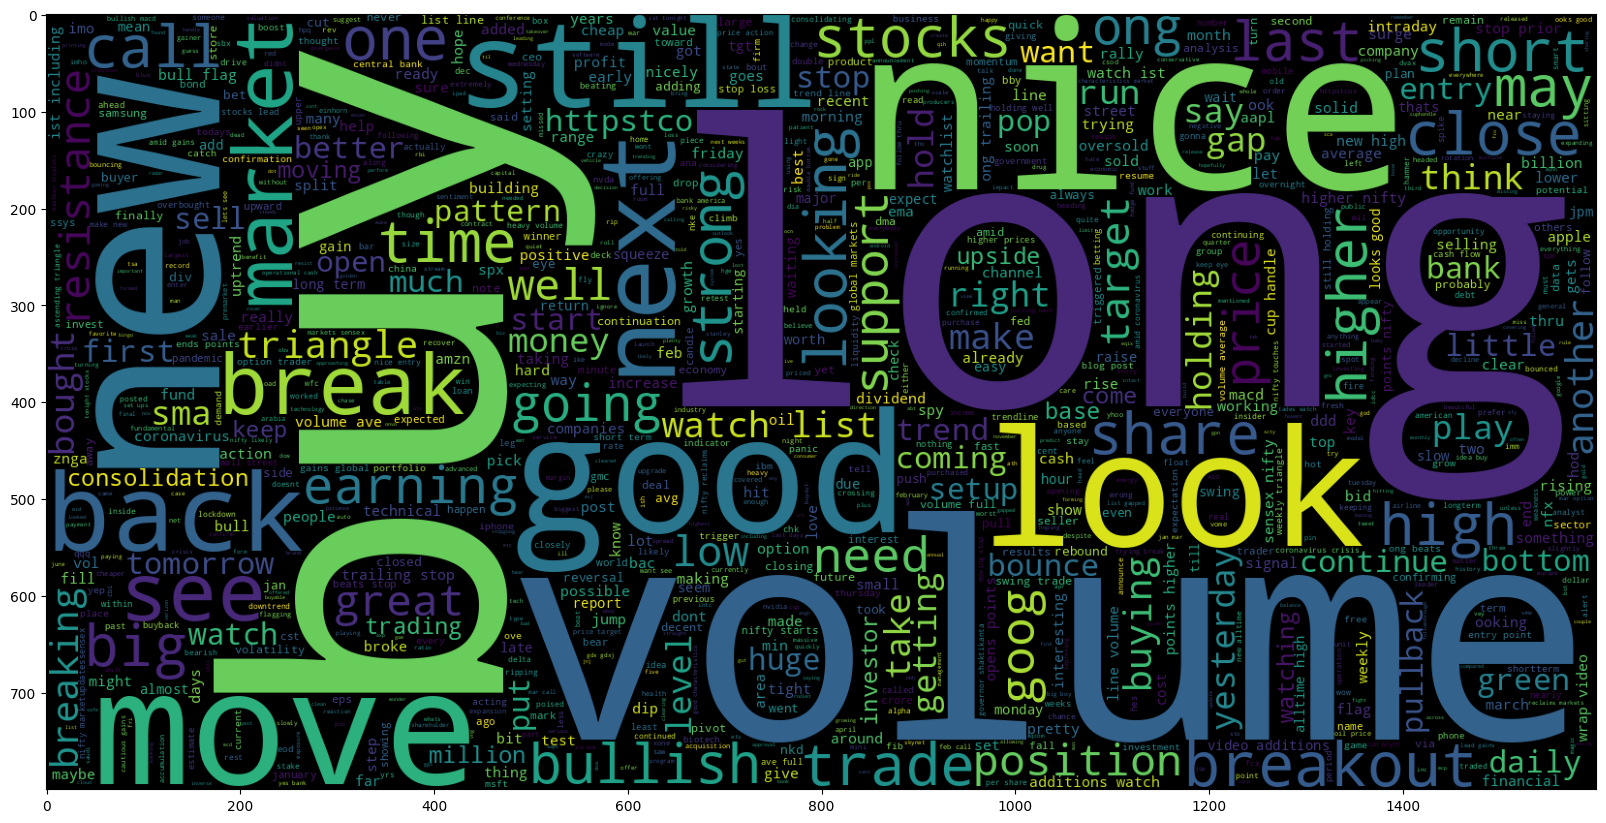

In [70]:
#Visualize the wordcloud for tweets that have positive sentiment
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(''.join(stock_df[stock_df['Sentiment']==1]['Text Without Punctuation & Stopwords Joined'])) #create one huge string with all positive text
plt.imshow(wc)

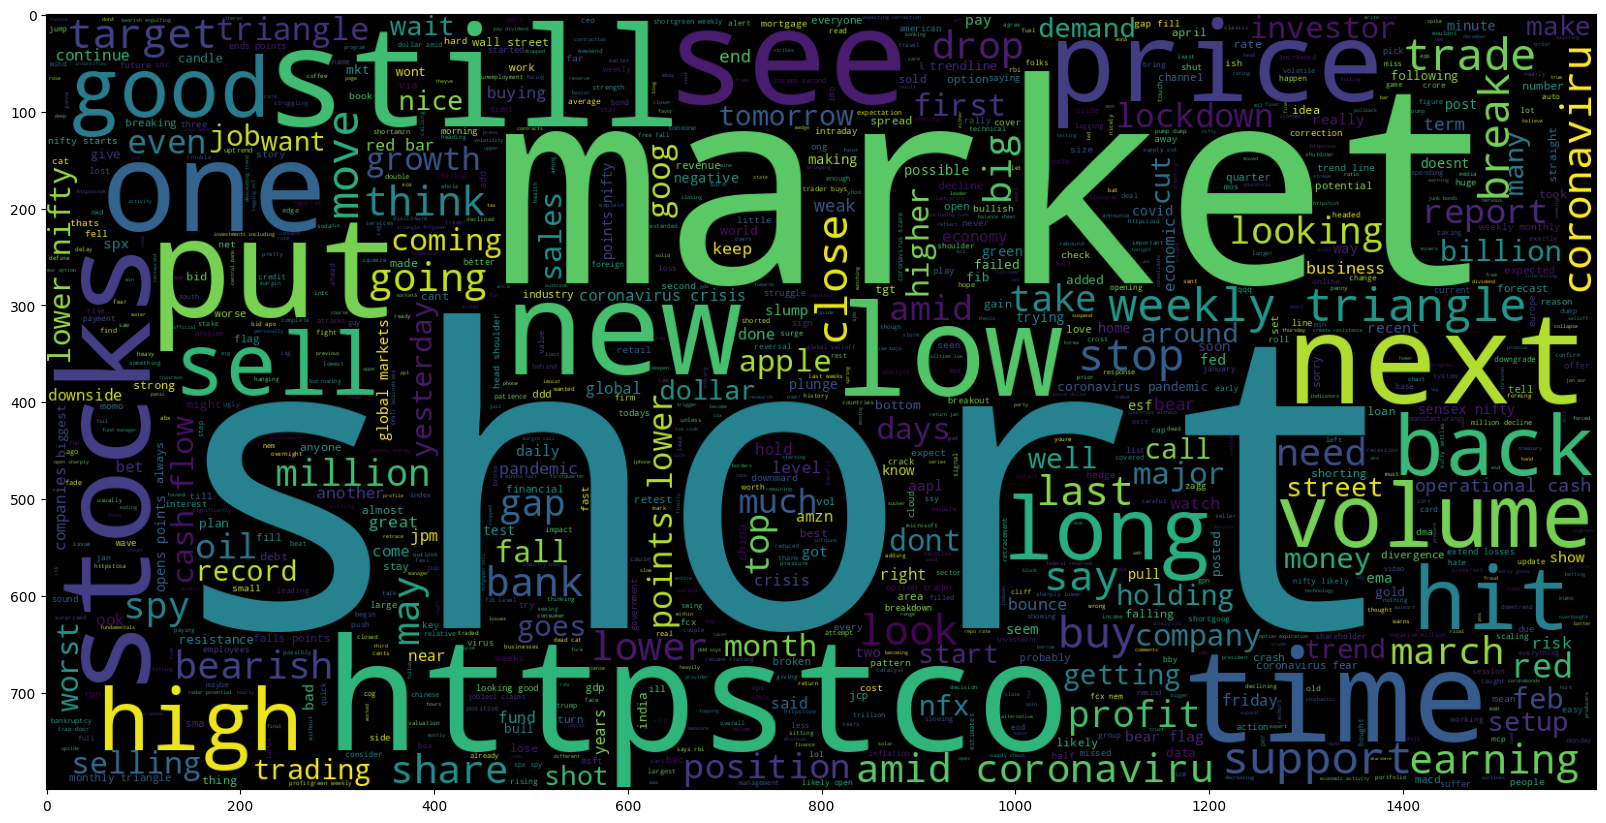

In [71]:
#Visualize the wordcloud for tweets that have negative sentiment
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(''.join(stock_df[stock_df['Sentiment']==0]['Text Without Punctuation & Stopwords Joined'])) #create one huge string with all positive text
plt.imshow(wc)

# VISUALIZE CLEANED DATASETS

In [72]:
stock_df['Text Without Punctuation & Stopwords Joined'][0]

'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts'

In [75]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
nltk.word_tokenize(stock_df['Text Without Punctuation & Stopwords Joined'][0]) #word_tokenize is used to break up a string into words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [78]:
#Obtain the maximum length of data in the document
#To be used later when word embeddings are generated
maxlen = -1

for doc in stock_df['Text Without Punctuation & Stopwords Joined']:
  tokens = nltk.word_tokenize(doc)
  if (maxlen < len(tokens)):
    maxlen = len(tokens)

print('Max nuber of word in any document is', maxlen)

Max nuber of word in any document is 20


In [79]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punctuation & Stopwords Joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

In [80]:
#Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

# PREPARE THE DATA BY TOKENIZING AND PADDING

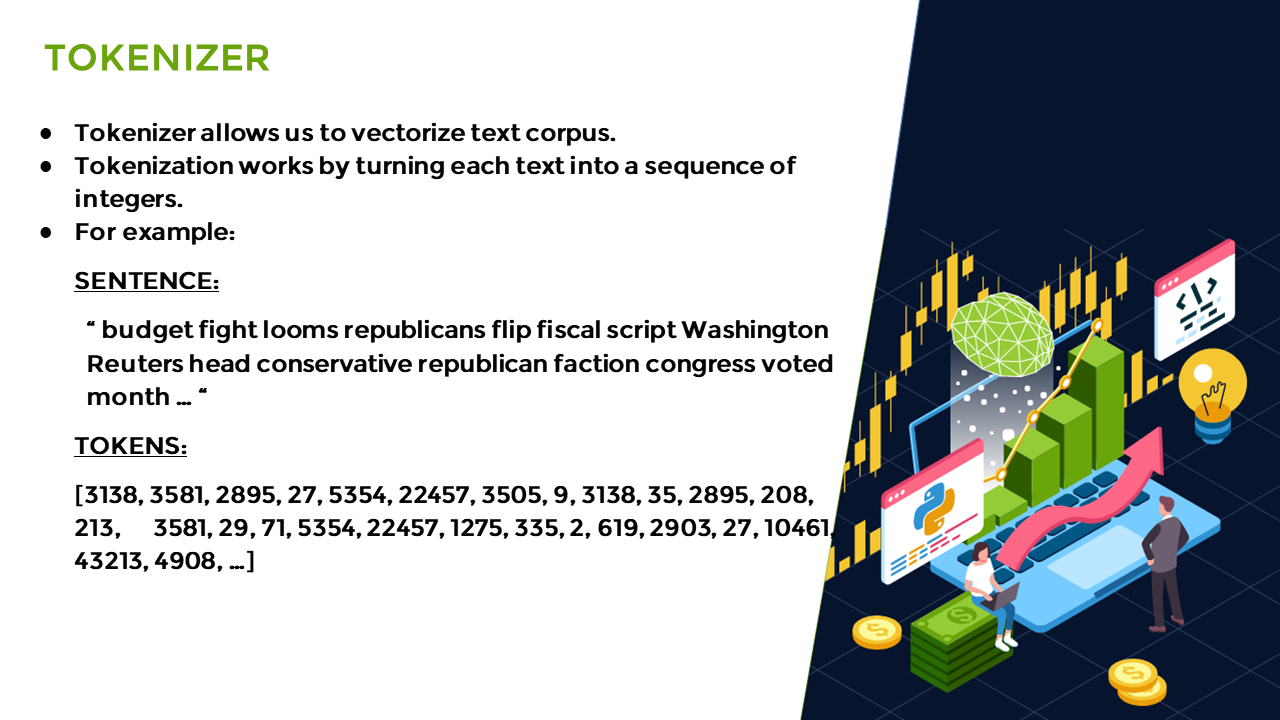

In [82]:

stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                   Text Without Punctuation & Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, feageed, indicator, trades, aw...   
2     [afraid, short, amzn, looking, like, nearmonop...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, days, highs, still, key...   

            Text Without Punctuation & Stopwords Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1         movie return feageed indicator trades awesome  
2     afraid short amzn looking like nearmonopoly eb...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 5 columns]

In [85]:
#Obtain the total words present in the dataset
list_of_words = []

for i in stock_df['Text Without Punctuation & Stopwords']:
  for j in i:
    list_of_words.append(j)


In [86]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'chea

In [89]:
#Obtain the total number of unique words
total_words=list(set(list_of_words))
total_words

['dksw',
 'charges',
 'currenâ',
 'noticed',
 'crashes',
 'extraordinary',
 'nkl',
 'bewae',
 'twitter',
 'knives',
 'reinvesting',
 'attention',
 'affect',
 'deposits',
 'dnb',
 'dtv',
 'damaging',
 'task',
 'vehicles',
 'smaller',
 'destroys',
 'probabilities',
 'gid',
 'euro',
 'founder',
 'undecided',
 'ngt',
 'restaurants',
 'isk',
 'gdot',
 'salesman',
 'ymzmeleyr',
 'readyscoregoals',
 'fadethen',
 'httpstcoyn',
 'multikin',
 'plain',
 'inh',
 'maintaining',
 'barkley',
 'jaein',
 'citron',
 'pun',
 'hsni',
 'offer',
 'cticnet',
 'acx',
 'aosipovich',
 'omega',
 'euters',
 'ideally',
 'squat',
 'bcei',
 'tjiimq',
 'opxa',
 'grew',
 'dqad',
 'mst',
 'davidamichaels',
 'club',
 'dressing',
 'undergoing',
 'nursing',
 'kelly',
 'unlocking',
 'self',
 'linger',
 'megabanks',
 'grams',
 'httpstcobgz',
 'prev',
 'ope',
 'progenitor',
 'force',
 'esecjnkdax',
 'came',
 'refreshes',
 'drew',
 'reliance',
 'touching',
 'martket',
 'eet',
 'hof',
 'columbian',
 'httpstcoxzdfkil',
 'toes',

In [90]:
total_words = len(list(set(list_of_words)))
total_words

9268

In [93]:
#Split the data into test and train
X = stock_df['Text Without Punctuation & Stopwords']
y = stock_df['Sentiment']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [94]:
X_train.shape

(5211,)

In [96]:
X_test.shape

(580,)

In [97]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [98]:
train_sequences

[[1309, 766, 66, 132, 13],
 [122, 159, 275, 640, 767, 2474, 768],
 [6, 51, 523],
 [524, 1134, 214, 286, 488, 1911, 390, 229, 1912],
 [20, 2475, 2476, 525, 983, 984, 769, 1310, 1539, 337, 41, 3638, 3639, 3640],
 [21, 1135, 48, 29, 985, 338, 27, 462, 39, 2477],
 [147, 1311, 116, 148, 3641, 986, 361, 40, 770, 28],
 [21, 562, 48, 14, 29, 987, 49, 771, 168, 362, 338, 27, 462, 1540, 3642, 3643],
 [882, 12, 179, 287],
 [317, 3644, 3645],
 [22, 3646, 1312, 3647, 3648, 20, 3649, 3650, 3651],
 [363, 243, 28, 41, 1913, 526, 8, 690, 772, 286, 463],
 [152, 101, 1, 988, 149, 256, 133, 3652, 337, 390],
 [3653, 691],
 [641, 133, 106, 57, 2, 364, 33],
 [883, 1541, 3, 3654, 4, 45, 14],
 [989, 15, 42, 8, 2],
 [391, 604, 773, 79, 1136],
 [563, 2478, 692, 339, 186, 2479, 204, 123, 300, 3655],
 [3656,
  990,
  2480,
  1914,
  2481,
  1313,
  1137,
  1915,
  15,
  774,
  1916,
  1314,
  1542,
  436,
  3657],
 [2482, 215, 1917, 2483, 2484],
 [3658, 392, 301, 642, 8],
 [1918, 124, 2485, 1919, 1920, 2486, 169, 

In [99]:
test_sequences

[[346, 359, 4, 110, 25, 131, 187, 1491, 164, 57],
 [54, 7, 81, 160],
 [34, 155, 193, 25, 4, 6484, 52],
 [10, 137, 461, 193],
 [54, 1045, 34, 17, 1045],
 [239, 3057],
 [117, 7711, 8359, 342, 323, 2947, 1249, 2051],
 [363, 4, 106],
 [6558, 103, 268, 639, 3386, 1677],
 [5],
 [6126, 6127, 150, 109, 392, 6, 1097, 60, 435, 235],
 [638, 6335, 960, 1073, 283, 7632, 2404, 768],
 [22, 163, 1076, 395, 240],
 [159, 374, 958, 1310, 34, 278, 2131, 1288, 7126],
 [],
 [1831, 3585, 2083, 1360, 103, 8047, 1565],
 [87, 792, 289, 107, 37, 715, 1778, 2227],
 [141, 401, 1129],
 [45, 733, 42, 17, 84, 1420, 1172, 541],
 [316, 895, 251, 193, 25, 11, 597],
 [10, 122, 272, 431, 1516, 133, 661],
 [6, 1044, 487],
 [1266, 69, 670],
 [761, 1026, 2217, 7, 52, 64, 165, 1225],
 [79, 73, 3, 3834, 16, 126, 296, 573, 73],
 [10, 2717, 243, 174, 86, 2192],
 [1073, 169, 6257, 74, 194, 1039, 440],
 [20, 673, 210, 626, 8, 455, 414, 220, 5765],
 [112, 49, 905, 168, 59, 236, 1211, 572, 30, 2529, 2292, 18, 197, 2286],
 [187, 45, 

In [100]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 723    [vol, many, people, gonna, lose, butt, buyout]
Name: Text Without Punctuation & Stopwords, dtype: object 
 is:  [122, 159, 275, 640, 767, 2474, 768]


In [101]:
# Add padding(to balance lengths) to training and testing
padded_train = pad_sequences(train_sequences, maxlen=29)
padded_test = pad_sequences(test_sequences, maxlen=29)


In [102]:
for i, doc in enumerate(padded_train[:3]):
  print('The padded encoding for document:', i+1, 'is', doc)

The padded encoding for document: 1 is [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 1309  766   66  132
   13]
The padded encoding for document: 2 is [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  122  159  275  640  767 2474
  768]
The padded encoding for document: 3 is [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   6  51 523]


In [103]:

y_train

672     1
723     0
4431    0
1097    0
5351    0
       ..
4303    1
124     0
717     1
1183    0
1001    1
Name: Sentiment, Length: 5211, dtype: int64

In [ ]:
#Convert the data to categorical 2D representation

In [104]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [105]:
y_train_cat.shape

(5211, 2)

In [107]:
y_train_cat

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [106]:
y_test_cat.shape

(580, 2)

# BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

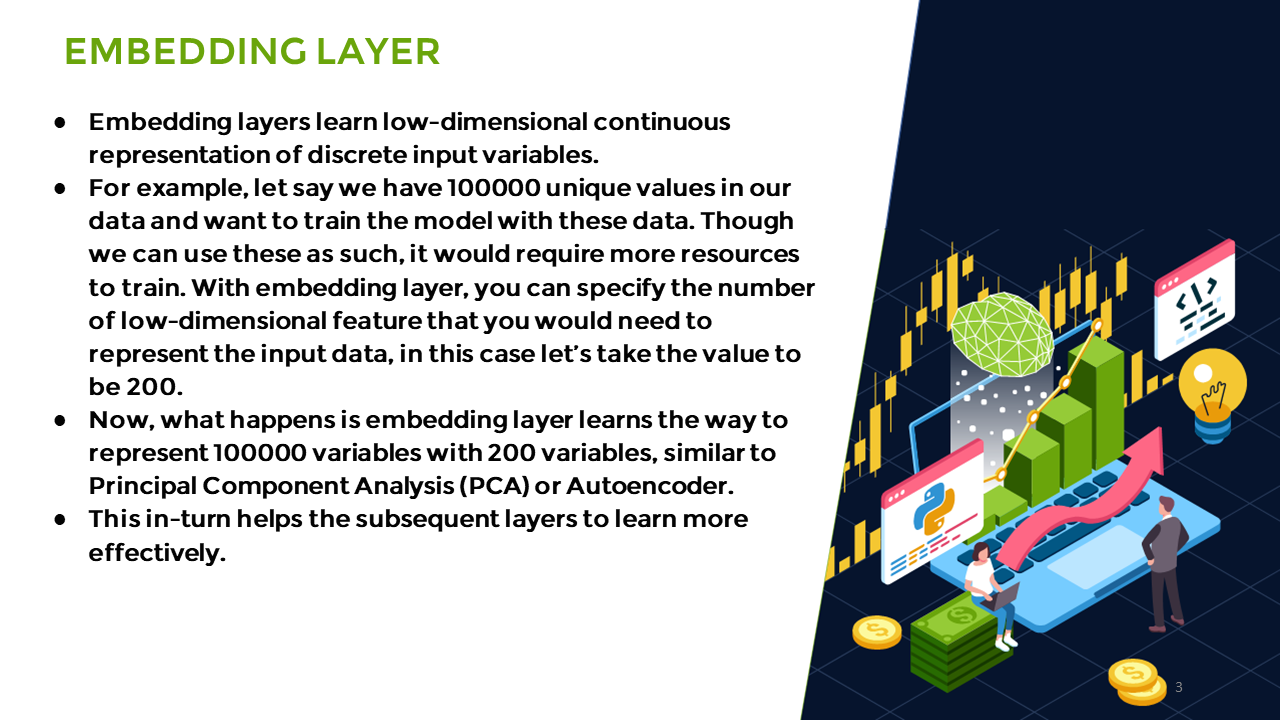

Finally!

In [109]:
#Sequential Model

model = Sequential()
model.add(Embedding(total_words, output_dim = 512))

model.add(LSTM(256))

model.add(Dense(128, activation='relu')) #Rectified Linear Unit
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         4745216   
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5565826 (21.23 MB)
Trainable params: 5565826 (21.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
#Train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 49s 351ms/step - loss: 0.5657 - acc: 0.7063 - val_loss: 0.4973 - val_acc: 0.7392
Epoch 2/2
131/131 [==============================] - 43s 327ms/step - loss: 0.2698 - acc: 0.8911 - val_loss: 0.5556 - val_acc: 0.7296


# ASSESS TRAINED MODEL PERFORMANCE

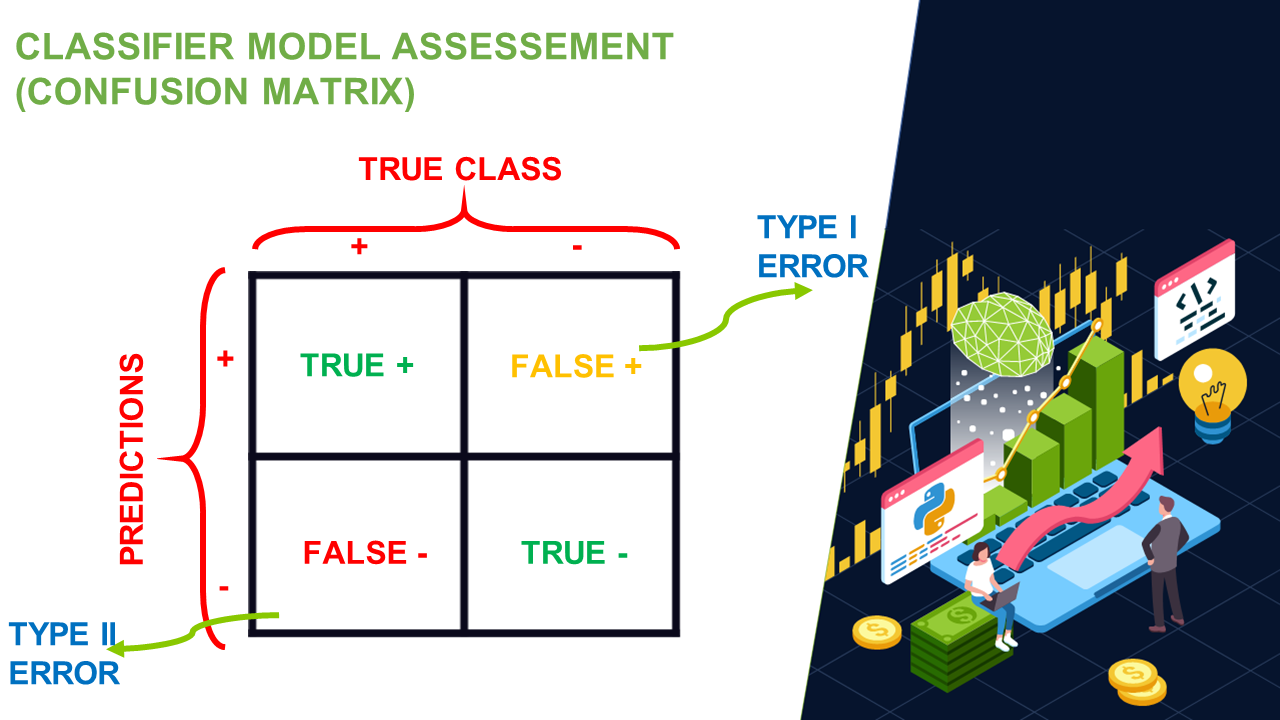

In [111]:
#Make prediction
pred = model.predict(padded_test)

19/19 [==============================] - 3s 94ms/step


In [112]:
pred

array([[0.88274616, 0.11725379],
       [0.36650336, 0.63349664],
       [0.00426845, 0.9957315 ],
       ...,
       [0.04727634, 0.9527237 ],
       [0.0340092 , 0.9659908 ],
       [0.24161567, 0.75838435]], dtype=float32)

In [113]:
#Make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [114]:
prediction

[0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,


In [115]:
#List containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [116]:
#Acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7603448275862069

<Axes: >

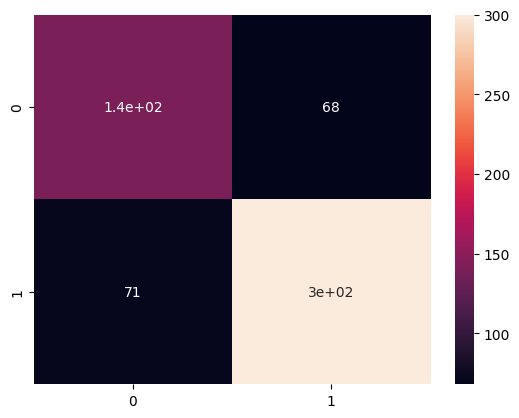

In [117]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)

End